In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-movie-reviews-cleaned/IMDB_movie_reviews_cleaned_3.csv
/kaggle/input/imdb-movie-reviews-cleaned/IMDB_movie_reviews_cleaned_2.csv
/kaggle/input/imdb-movie-reviews-cleaned/__notebook_source__.ipynb
/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import re

In [3]:
df = pd.read_csv("../input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


No missing data👍

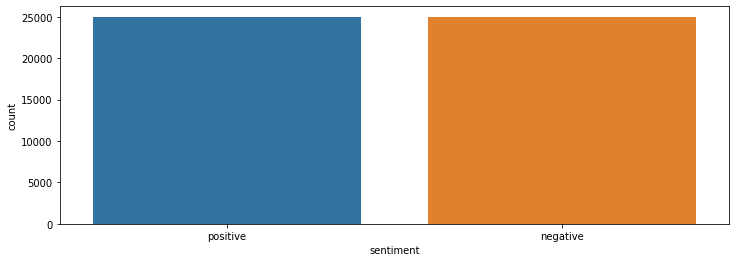

In [6]:
plt.figure(figsize=(12, 4))
sns.countplot(x="sentiment", data=df)
plt.show()

Positive and negative reviews have the same(or very similar) counts👍

# Text Pre-processing

List of possible pre-processing methods(✔ == technique actually used here):

* Expand Contractions ✔
* Remove HTML tags ✔
* Remove emojis ✔
* Remove punctuation & Special characters ✔
* Remove any URLs ✔
* Make everything lowercase ✔
* Remove accented characters (convert "Sómě Áccěntěd těxt" to "Some Accented text") ✔
* Remove @mentions (typically for twitter/social media text)
* Spelling correction (tried implementing but takes too long)


* Remove stopwords ✔ (only for analysis)
* Stemming
* Lemmatization

In [7]:
# contractions_dict found here: 
# https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/


contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", 
                     # lowercase I contractions as well
                     "i'd": "i would", "i'd've": "i would have","i'll": "i will",
                     "i'll've": "i will have","i'm": "i am","i've": "i have","isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}


def expand_contractions(text):

    expanded_text = []
    for word in text.split():
        if word.lower() in list(contractions_dict.keys()):
            expanded_word = contractions_dict[word.lower()]
            expanded_text.append(expanded_word)
        else:
            expanded_text.append(word)

    expanded_text = " ".join(expanded_text)
    
    return expanded_text

In [8]:
def remove_twitter_mentions(text):
    new_text = re.sub(r'@[A-Za-z0-9_]+','',text)
    return new_text


def remove_hashtags(text):
    '''Removes the "#" from a hashtag - leaving only the term
    ie. "#earthquake" becomes "earthquake" '''
    pattern = re.compile(r'(#)([A-Za-z0-9_]+)')
    new_text = pattern.sub(r'\2',text)
    return new_text


def remove_emoji(text):
    # Reference: https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python
    
    pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    new_text = re.sub(pattern,'',text)
    return new_text

# NOTE: STILL NEED TO REMOVE @
def remove_punc_and_special_characters(text):
    ''' Removes any character which isn't an alphanumeric character(keeps contractions such as can't) 
    Keeps ',#,@,_\s (\s = whitespace) '''
    # new_text = re.sub(r'[^a-zA-Z0-9\'@#_\s]','', text)
    
    # this version does not keep @
    new_text = re.sub(r'[^a-zA-Z0-9\'#_\s]','', text)
    return new_text


def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)


def remove_HTML(text):
    '''Removes HTML tags from text'''
    html = re.compile(r'<.*?>')
    return html.sub(r'',text)


import unicodedata
def remove_accented_chars(text):
    # Reference: https://www.kdnuggets.com/2018/08/practitioners-guide-processing-understanding-text-2.html
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [9]:
# !pip install pyspellchecker

In [10]:
# from spellchecker import SpellChecker

# def spelling_correction(text):
#     # Remember to !pip install pyspellchecker before use
#     # References: https://www.kaggle.com/shahules/basic-eda-cleaning-and-glove#Data-Cleaning
#     # Reference: https://pypi.org/project/pyspellchecker/
#     spell = SpellChecker()
    
#     corrected_text = []
#     misspelled = spell.unknown(text.split())
    
#     for word in text.split():
#         if word in misspelled:
#             corrected_text.append(spell.correction(word))
#         else:
#             corrected_text.append(word)
    
#     text = " ".join(corrected_text)
#     return text

In [11]:
# Remove Stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    # could also use: word_tokens = text.split()
    
    filtered_sentence = []
    
    for word in word_tokens:
        if word not in stop_words:
            filtered_sentence.append(word)
    
    new_text = ' '.join(filtered_sentence)
    
    return new_text

In [12]:
def text_cleaner(text):

    text = remove_HTML(text)
    text = remove_URL(text)
    text = remove_emoji(text)
    text = expand_contractions(text)
    text = remove_accented_chars(text)
    text = remove_punc_and_special_characters(text)
#     text = expand_contractions(text)
    text = text.lower()
#     text = spelling_correction(text) (spelling corrections takes forever to run)
    
    return text

In [13]:
# # df['review'] = df['review'].apply(text_cleaner)
# # df.shape[0]/1000

# import time

# count = 50
# prev_count = 0
# # number_of_rows = df.shape[0]
# while count <= df.shape[0]:
#     start = time.time()
    
#     df['review'][prev_count:count] = df['review'][prev_count:count].apply(text_cleaner)
    
    
#     end = time.time()
#     duration = end - start
    
#     print (f"----- Iteration {count/50.0} of 1000. Iteration took {duration} seconds to complete -----")
    
#     prev_count = count
#     count += 50

Convert "sentiment" column from "positive" and "negative" to 1 and 0.

* positive == 1
* negative == 0

In [14]:
# def convert_sentiment(sentiment):
#     if sentiment == "positive":
#         return 1
#     else:
#         return 0

# df['sentiment'] = df['sentiment'].apply(convert_sentiment)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Saved the cleaned data, instead of running the preprocessing every time.
Now I can import it into the notebook.

In [16]:
# df.to_csv('IMDB_movie_reviews_cleaned_3.csv', index=False)

clean_df = pd.read_csv("../input/imdb-movie-reviews-cleaned/IMDB_movie_reviews_cleaned_3.csv")

# clean_df = df.copy(deep=True)

# EDA

* Distribution of N-gram counts (eg. top unigrams & bigrams) (before and after stopword removal???)
* Wordcloud?
* Distribution of top part-of-speech tags?
* Distribution of sentence/Review lengths(eg. number of characters)



stopwords were left in the original dataset, as they may contain crucial information. example: if we remove stopwords, "was not good" becomes "good"

### Top Unigrams, Bigrams, & Trigrams

In [17]:
full_text = ""
number_of_rows = clean_df.shape[0]
for row in range(number_of_rows): #range(50):
    text = clean_df.iloc[row]["review"]
    
    full_text += text

In [18]:
def get_sorted_unigrams(full_text):
    unigramCount = {}
    for word in full_text.split():
        value = unigramCount.get(word, "None")

        if value == "None":
            unigramCount[word] = 1
        else:
            unigramCount[word] = value + 1
    
    unigram_count = pd.Series(unigramCount)
    sorted_unigrams = unigram_count.sort_values(ascending=False)
    
    return sorted_unigrams


def get_sorted_bigrams(full_text):
    bigramCount = {}
    full_text_list = full_text.split()
    for i in range(len(full_text_list)):
        if i < len(full_text_list) - 1:
            bigram = full_text_list[i] + " " + full_text_list[i + 1]
            value = bigramCount.get(bigram, "None")

            if value == "None":
                bigramCount[bigram] = 1
            else:
                bigramCount[bigram] = value + 1
    
    
    bigram_count = pd.Series(bigramCount)
    sorted_bigrams = bigram_count.sort_values(ascending=False)
    
    return sorted_bigrams
            

def get_sorted_trigrams(full_text):
    trigramCount = {}
    full_text_list = full_text.split()
    for i in range(len(full_text_list)):
        if i < len(full_text_list) - 2:
            trigram = full_text_list[i] + " " + full_text_list[i + 1] + " " + full_text_list[i + 2]
            value = trigramCount.get(trigram, "None")

            if value == "None":
                trigramCount[trigram] = 1
            else:
                trigramCount[trigram] = value + 1
            
            
    trigram_count = pd.Series(trigramCount)
    sorted_trigrams = trigram_count.sort_values(ascending=False)
    
    return sorted_trigrams

### Stopwords Not Removed

In [19]:
sorted_unigrams = get_sorted_unigrams(full_text)
sorted_bigrams = get_sorted_bigrams(full_text)
sorted_trigrams = get_sorted_trigrams(full_text)

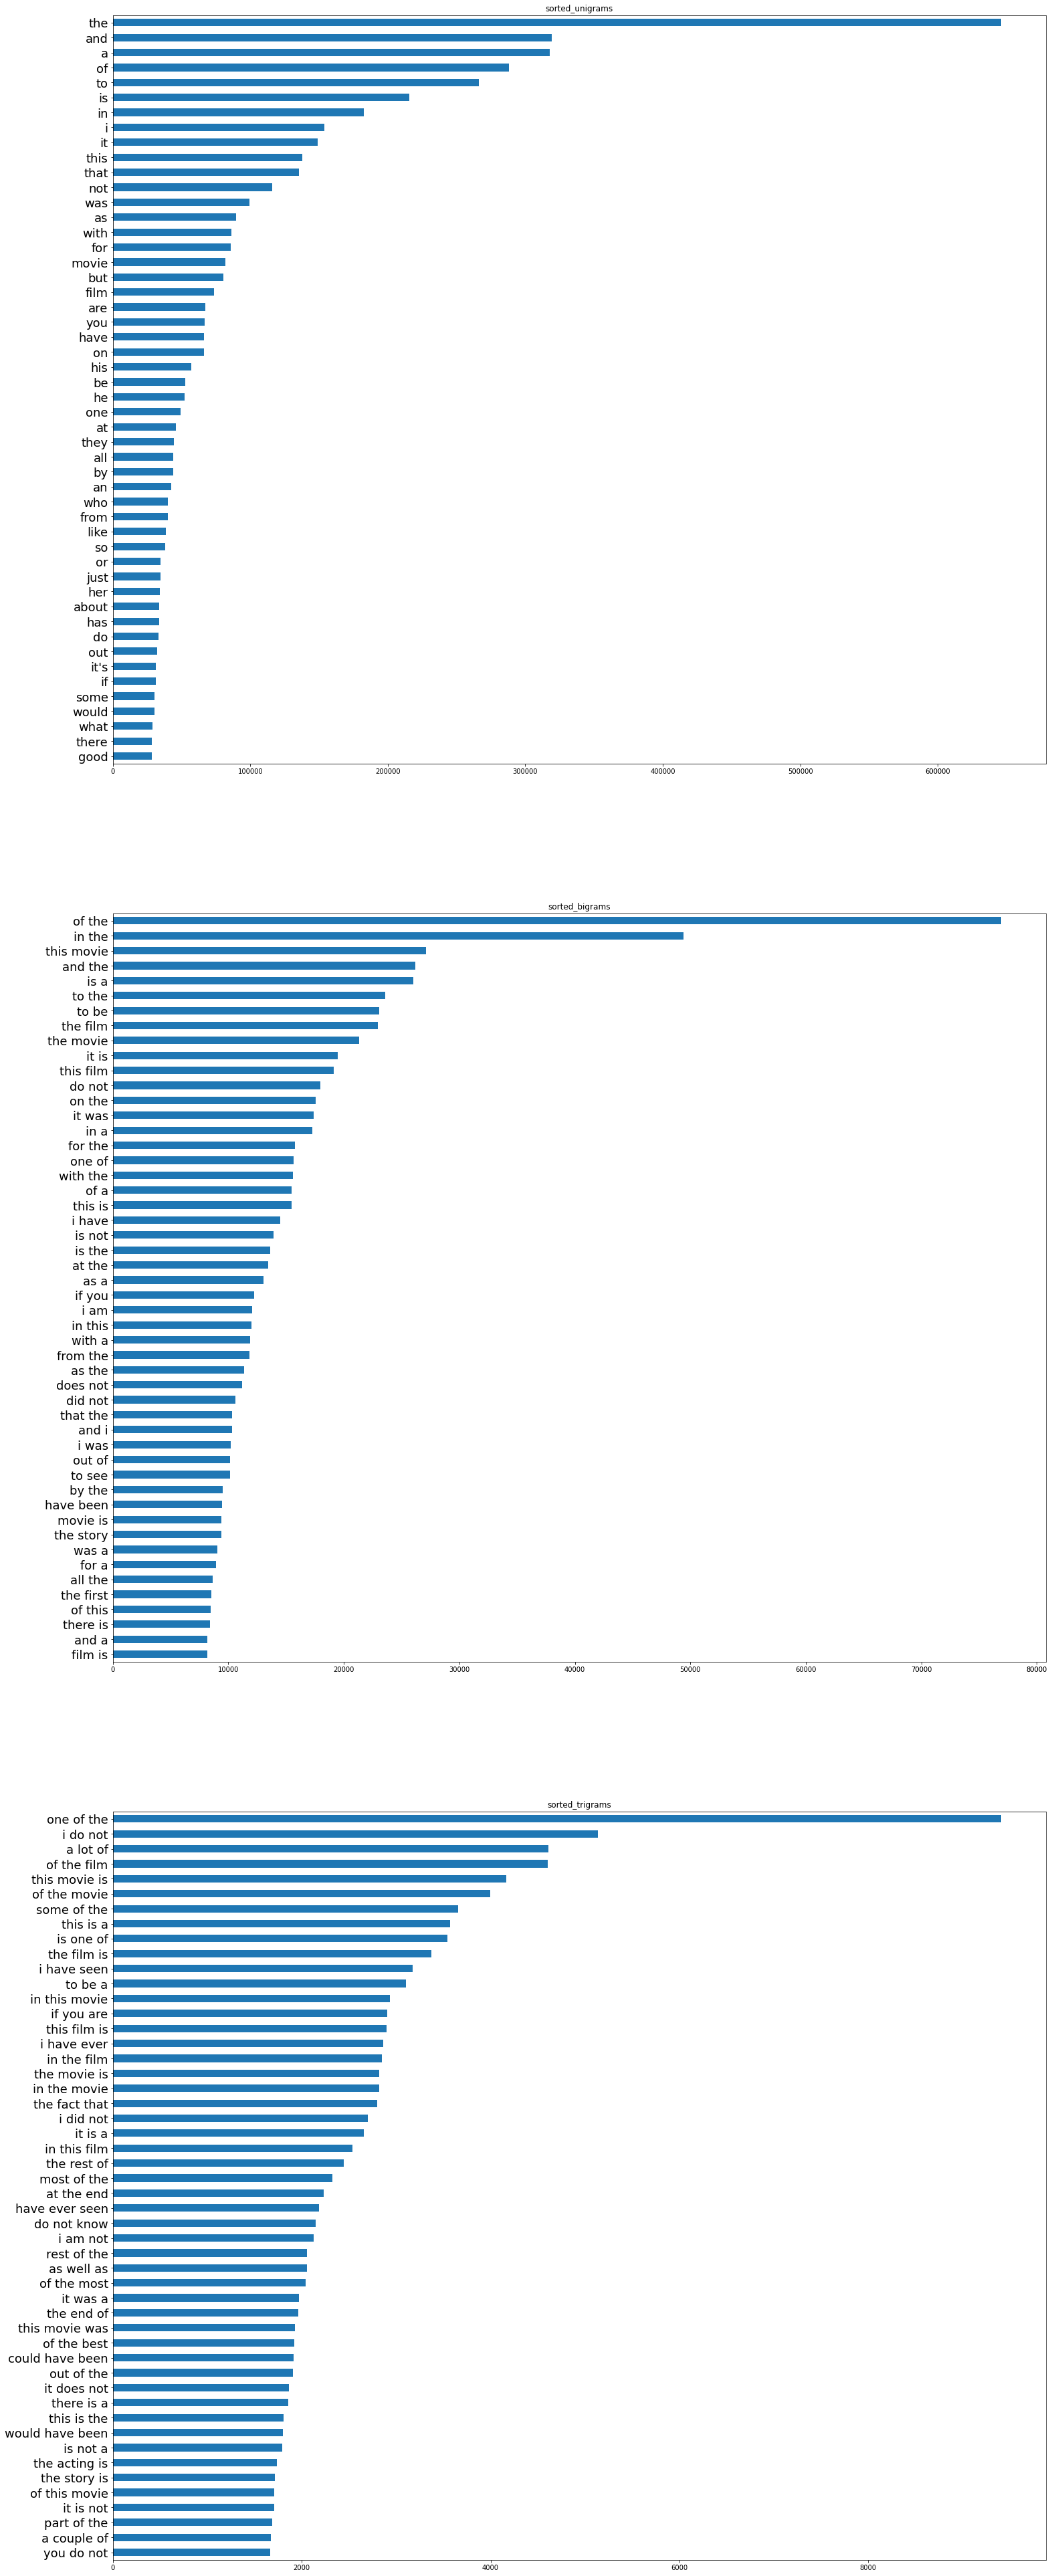

In [20]:
plt.rc('ytick', labelsize=18)

plt.figure(figsize=(25, 70))

plt.subplot(3,1,1)
plt.title("sorted_unigrams")
sorted_unigrams[:50].plot(kind='barh')
plt.gca().invert_yaxis()

plt.subplot(3,1,2)
plt.title("sorted_bigrams")
sorted_bigrams[:50].plot(kind='barh')
plt.gca().invert_yaxis()

plt.subplot(3,1,3)
plt.title("sorted_trigrams")
sorted_trigrams[:50].plot(kind='barh')
plt.gca().invert_yaxis()

plt.show()

### Stopwords Removed

In [21]:
no_stopwords_df = clean_df.copy(deep=True)

In [22]:
no_stopwords_df['review'] = no_stopwords_df['review'].apply(remove_stopwords)

In [23]:
full_text = ""
number_of_rows = clean_df.shape[0]
for row in range(number_of_rows):
    text = no_stopwords_df.iloc[row]["review"]
    
    full_text += text

In [24]:
sorted_unigrams_2 = get_sorted_unigrams(full_text)
sorted_bigrams_2 = get_sorted_bigrams(full_text)
sorted_trigrams_2 = get_sorted_trigrams(full_text)

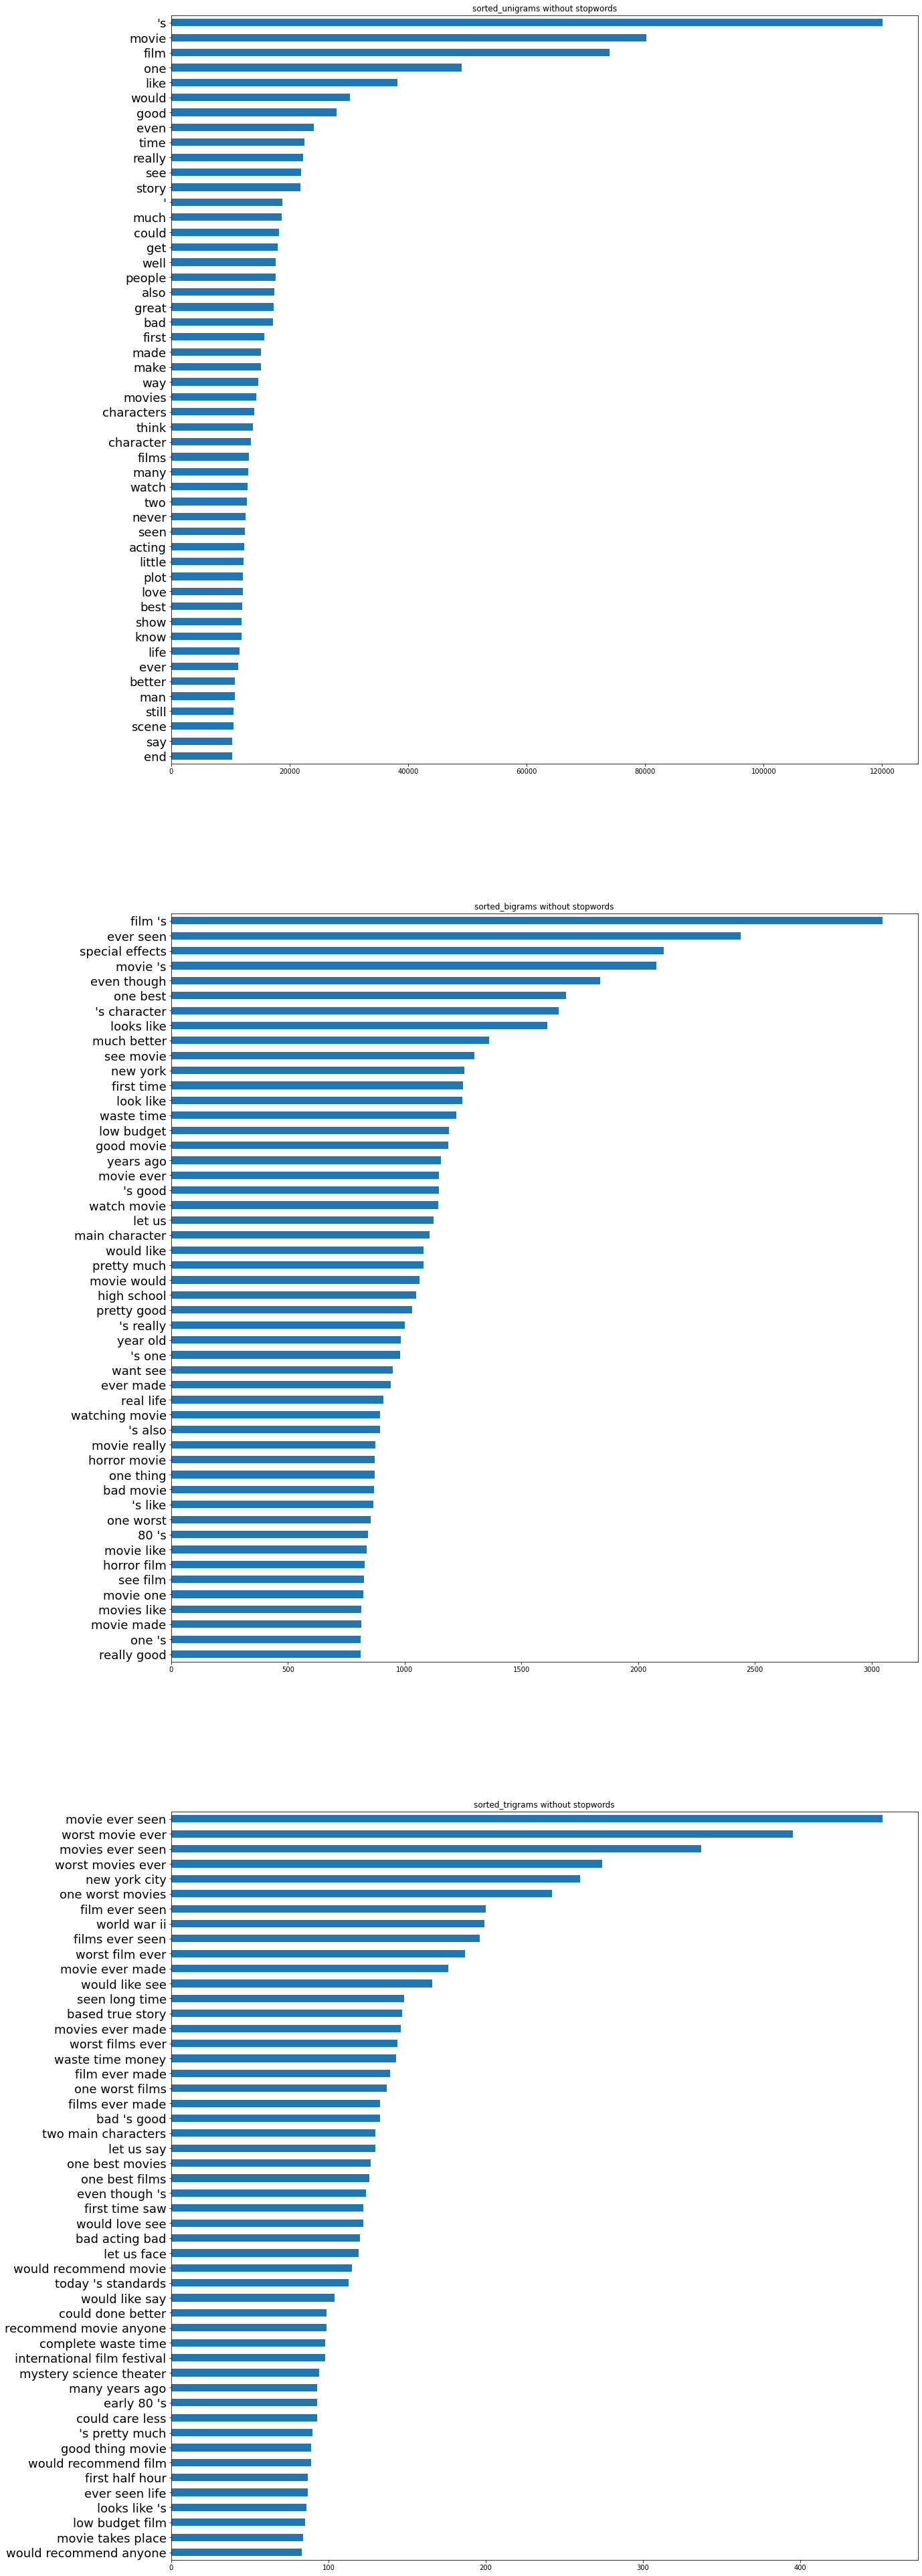

In [25]:
# plt.rcParams.update({'font.size': 22})
plt.rc('ytick', labelsize=18)

plt.figure(figsize=(20, 70))

plt.subplot(3,1,1)
plt.title("sorted_unigrams without stopwords")
sorted_unigrams_2[:50].plot(kind='barh')
plt.gca().invert_yaxis()

plt.subplot(3,1,2)
plt.title("sorted_bigrams without stopwords")
sorted_bigrams_2[:50].plot(kind='barh')
plt.gca().invert_yaxis()

plt.subplot(3,1,3)
plt.title("sorted_trigrams without stopwords")
sorted_trigrams_2[:50].plot(kind='barh')
plt.gca().invert_yaxis()

plt.show()

# Analysis
#### Unigrams




#### Bigrams





#### Trigrams



# Compare good reviews and bad reviews???

👍Use dataframe with stopwords removed

In [26]:
no_stopwords_df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically 's family little boy jake thinks 's ...,0
4,petter mattei 's love time money visually stun...,1


In [27]:
good_df = no_stopwords_df[no_stopwords_df["sentiment"] == 1]
bad_df = no_stopwords_df[no_stopwords_df["sentiment"] == 0]


good_full_text = ""
number_of_rows = good_df.shape[0]
for row in range(number_of_rows):
    text = good_df.iloc[row]["review"]
    
    good_full_text += text
    

bad_full_text = ""
number_of_rows = bad_df.shape[0]
for row in range(number_of_rows):
    text = bad_df.iloc[row]["review"]
    
    bad_full_text += text

In [28]:
# good_full_text

In [29]:
sorted_unigrams_good = get_sorted_unigrams(good_full_text)
sorted_bigrams_good = get_sorted_bigrams(good_full_text)
sorted_trigrams_good = get_sorted_trigrams(good_full_text)

sorted_unigrams_bad = get_sorted_unigrams(bad_full_text)
sorted_bigrams_bad = get_sorted_bigrams(bad_full_text)
sorted_trigrams_bad = get_sorted_trigrams(bad_full_text)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


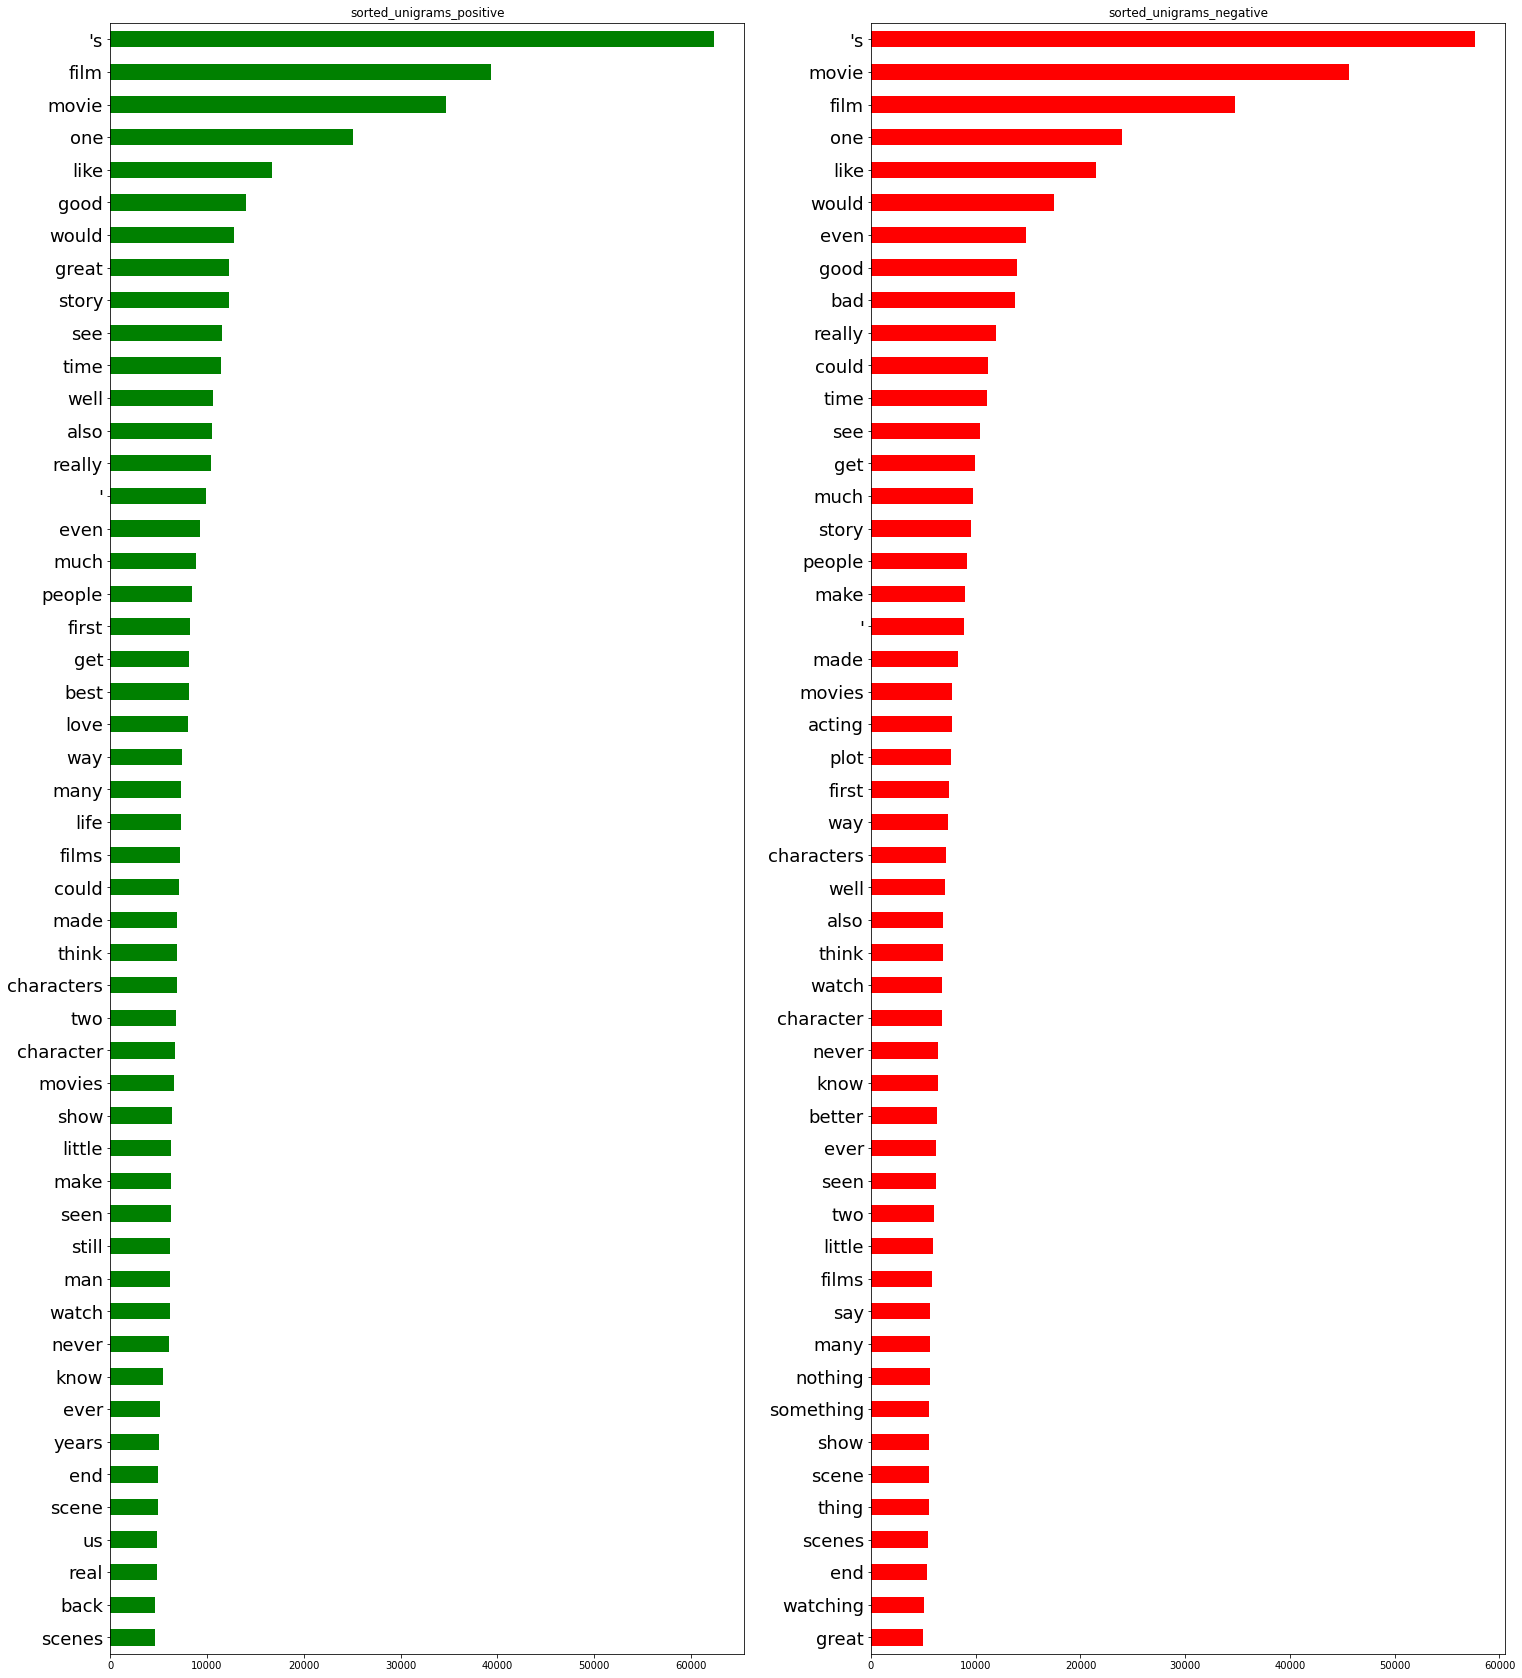

In [30]:
plt.rc('ytick', labelsize=18)

plt.figure(figsize=(25, 30))

plt.subplot(1,2,1)
plt.title("sorted_unigrams_positive")
sorted_unigrams_good[:50].plot(kind='barh', color='green')
plt.gca().invert_yaxis()

plt.subplot(1,2,2)
plt.title("sorted_unigrams_negative")
sorted_unigrams_bad[:50].plot(kind='barh', color='red')
plt.gca().invert_yaxis()

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


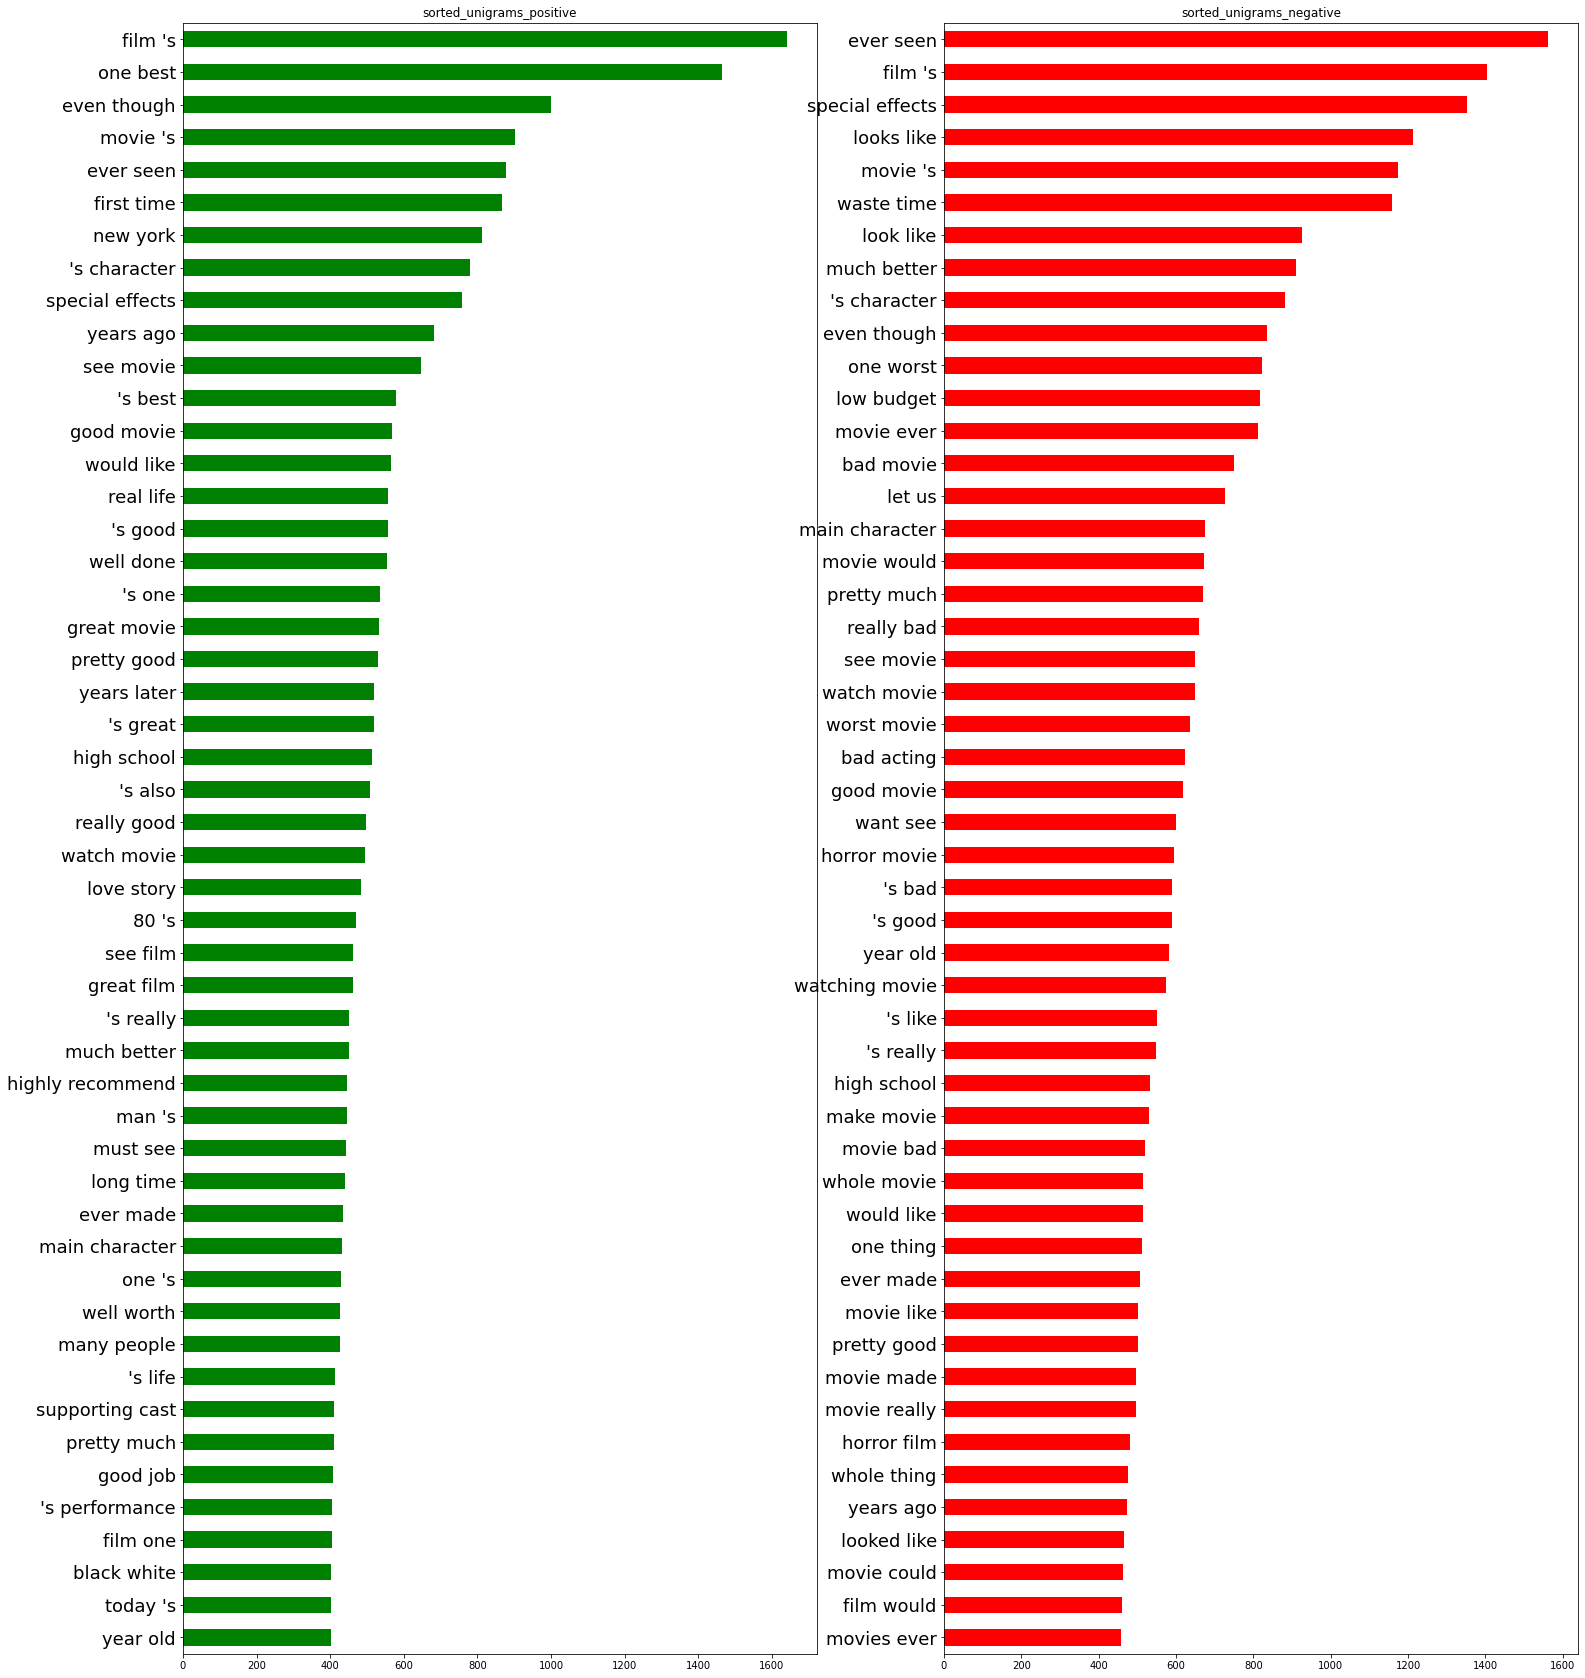

In [31]:
plt.rc('ytick', labelsize=18)

plt.figure(figsize=(25, 30))

plt.subplot(1,2,1)
plt.title("sorted_unigrams_positive")
sorted_bigrams_good[:50].plot(kind='barh', color='green')
plt.gca().invert_yaxis()

plt.subplot(1,2,2)
plt.title("sorted_unigrams_negative")
sorted_bigrams_bad[:50].plot(kind='barh', color='red')
plt.gca().invert_yaxis()

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


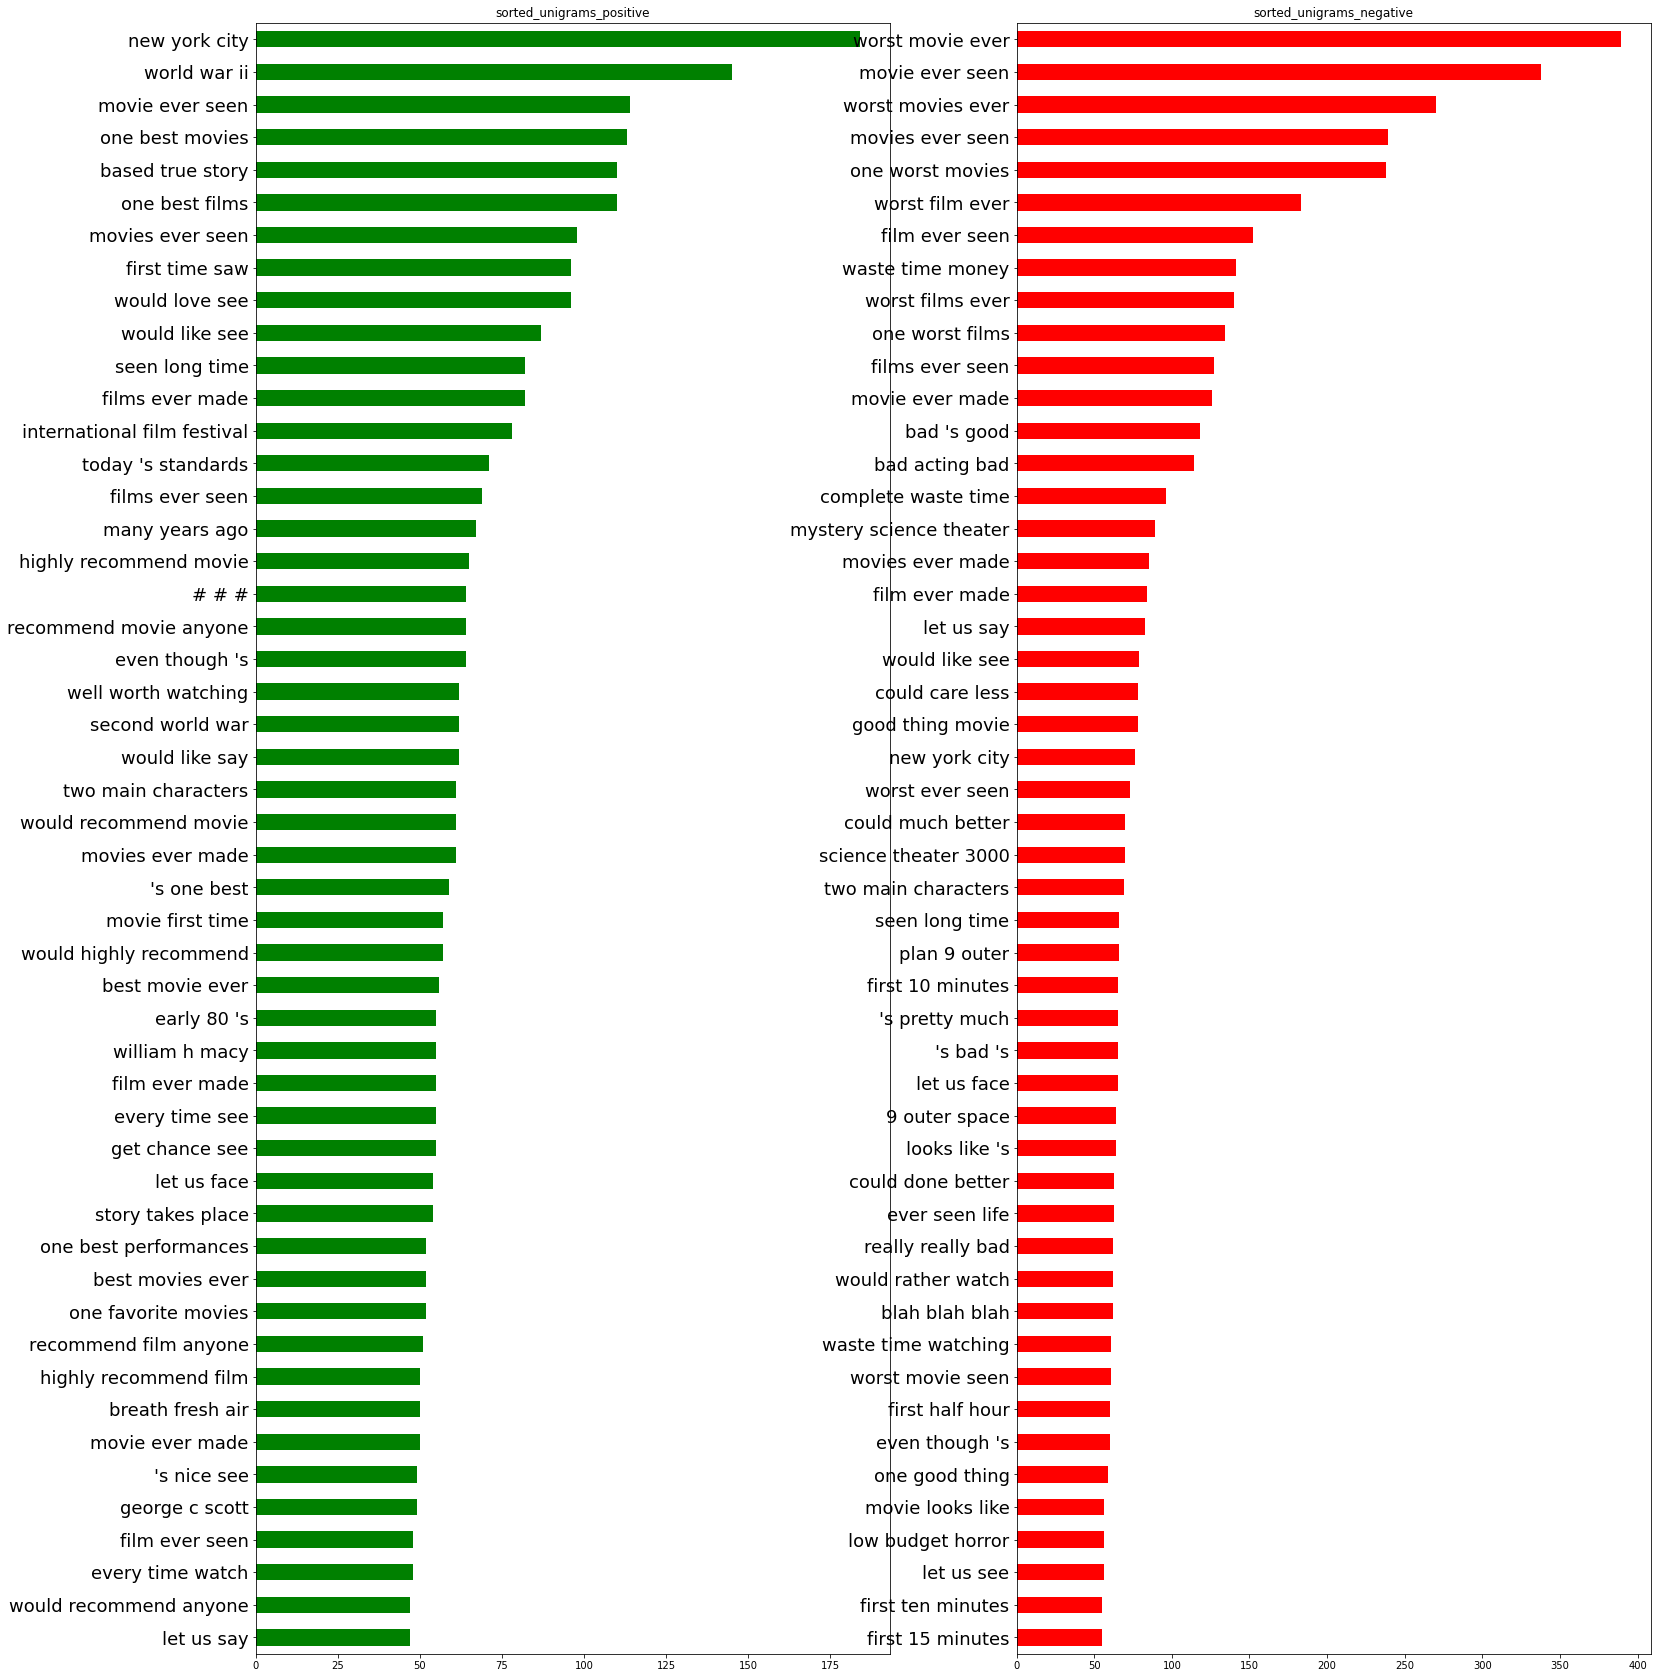

In [32]:
plt.rc('ytick', labelsize=18)

plt.figure(figsize=(25, 30))

plt.subplot(1,2,1)
plt.title("sorted_unigrams_positive")
sorted_trigrams_good[:50].plot(kind='barh', color='green')
plt.gca().invert_yaxis()

plt.subplot(1,2,2)
plt.title("sorted_unigrams_negative")
sorted_trigrams_bad[:50].plot(kind='barh', color='red')
plt.gca().invert_yaxis()